#### Image Classifier Inference Demo
- This notebook demonstrates how to use the modularized inference pipeline.
- It loads the trained model, preprocesses the images, makes predictions, and displays the results.

In [ ]:
import sys, os
from pathlib import Path

project_root = Path.cwd().parent.parent
sys.path.insert(0, str(project_root))

from Image_Classification.src.model.inference_utils import get_inference_transform, predict_image
from Image_Classification.src.data.visualization import display_predictions
from Image_Classification.src.model.model_loader import *

from Image_Classification.src.config import *

In [ ]:
# Load Model and Labels
model = load_model(IMAGE_CLASSIFIER_MODEL_PATH, NUM_CLASSES, DEVICE)
class_labels = load_class_labels(CLASS_LABELS_PATH)
transform = get_inference_transform()

In [9]:
# Prepare Test Images
if not os.path.exists(DEMO_IMG_DIR):
    os.makedirs(DEMO_IMG_DIR)
    print("Please add test images to the folder './data/demo_img'.")
else:
    test_images = [
        os.path.join(DEMO_IMG_DIR, img)
        for img in os.listdir(DEMO_IMG_DIR)
        if img.lower().endswith((".jpg", ".png", ".jpeg"))
    ]
    if not test_images:
        print("No test images found in './data/demo_img'. Please add at least one image.")
    else:
        print(f"Found {len(test_images)} test images.")

Found 10 test images.


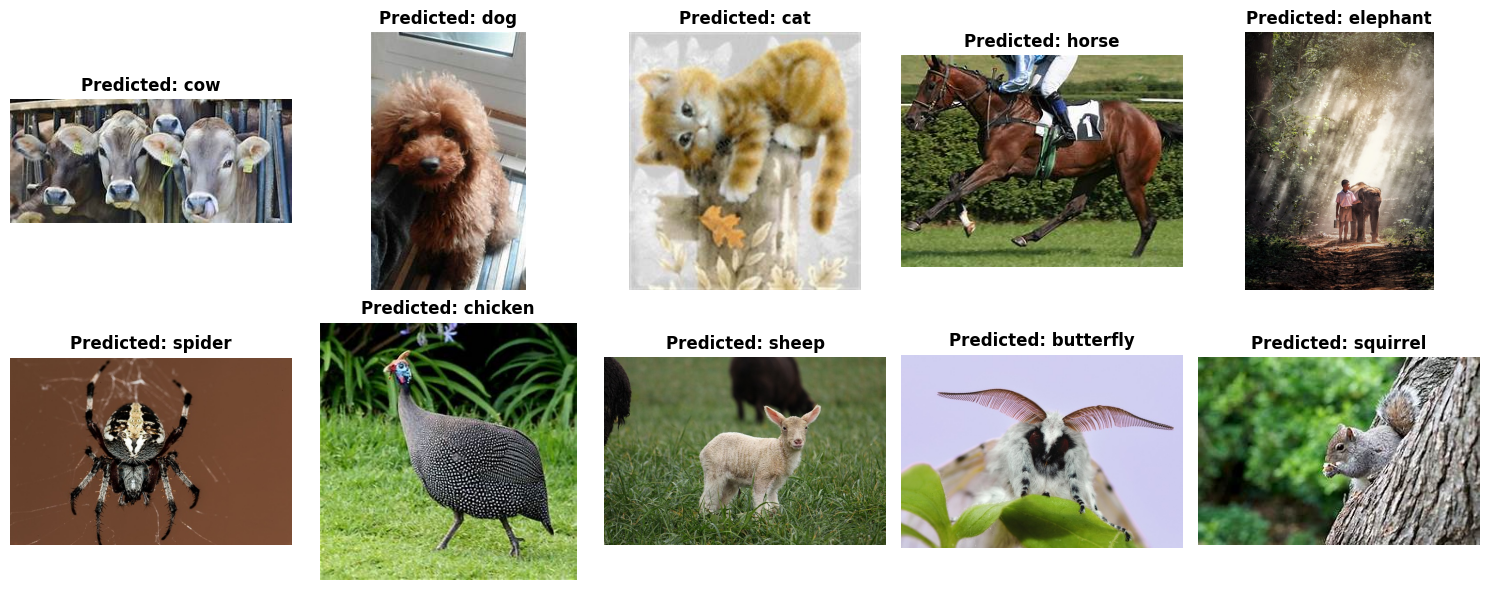

In [10]:
# Predict and Display Results
if test_images:
    predict_fn = lambda img_path: predict_image(model, transform, class_labels, img_path, device)
    display_predictions(test_images, predict_fn, num_images=10)